In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [5]:
month = date(2022, 5, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 5, 1), datetime.date(2022, 5, 31))

In [6]:
bom
eom

datetime.date(2022, 5, 1)

datetime.date(2022, 5, 31)

In [7]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-05-31" 
ORDER BY amount DESC



In [8]:
df = pd.read_sql(sql, conn)
df

,date,amount,item,kind
0,2022-05-31,10000,Parent,Parent
1,2022-05-31,640,Internet Home,Communication
2,2022-05-31,600,CCF,Luxury
3,2022-05-31,340,Packt,Edutainment
4,2022-05-31,320,Telephone Dtac,Communication
5,2022-05-31,190,Food,Food
6,2022-05-31,190,Monthly Prime,Movies
7,2022-05-31,170,Google,Edutainment
8,2022-05-31,100,Apple,Edutainment
9,2022-05-31,70,Patreon,Edutainment


In [9]:
df.amount.sum()

12660

In [10]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-05-31" 
ORDER BY amount DESC



In [11]:
df_eom = pd.read_sql(sql, conn)
df_eom

,date,amount,item,kind
0,2022-05-31,10000,Parent,Parent
1,2022-05-31,640,Internet Home,Communication
2,2022-05-31,600,CCF,Luxury
3,2022-05-31,340,Packt,Edutainment
4,2022-05-31,320,Telephone Dtac,Communication
5,2022-05-31,190,Food,Food
6,2022-05-31,190,Monthly Prime,Movies
7,2022-05-31,170,Google,Edutainment
8,2022-05-31,100,Apple,Edutainment
9,2022-05-31,70,Patreon,Edutainment


In [12]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-05-01" AND "2022-05-31" 
ORDER BY date



In [13]:
df_t = pd.read_sql(sql, conn)
df_t.head()

,date,amount,item,kind
0,2022-05-04,670,Food,Food
1,2022-05-07,180,Food,Food
2,2022-05-07,1510,Fuel,Transportation
3,2022-05-07,2570,Pets,Pets
4,2022-05-10,430,Food,Food


In [14]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple                 140
Books & Software      610
CCF                   600
Food                 3340
Fuel                 3110
Google                170
Internet Home         640
Monthly Prime         190
Mother              17300
Packt                 340
Parent              10000
Patreon                70
Pets                19810
Telephone Dtac        320
Name: amount, dtype: int64

In [15]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Communication       960
Edutainment        1330
Food               3340
Luxury              600
Movies              190
Parent            27300
Pets              19810
Transportation     3110
Name: amount, dtype: int64

In [16]:
expense = grouped.amount.sum()
sum(expense)

56640

<Figure size 864x864 with 0 Axes>

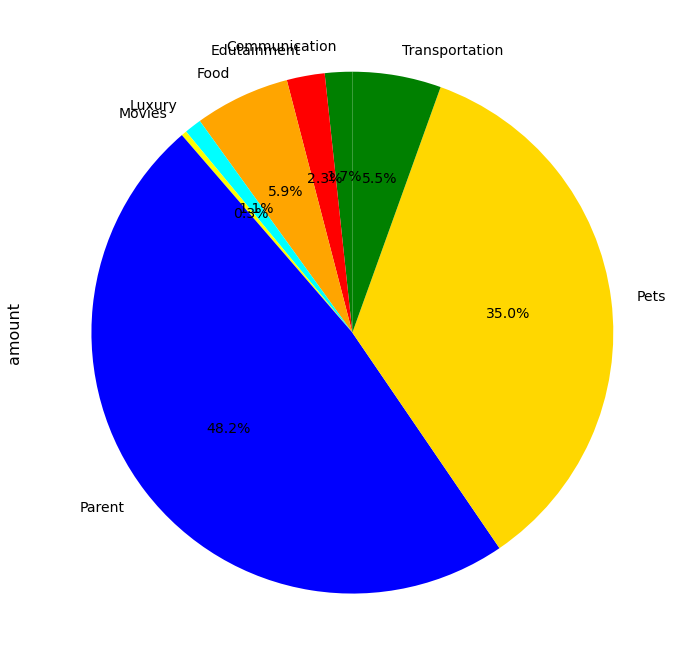

In [17]:
fig_path = "../fig/Expense-2205.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [18]:
expense.to_csv("../data/expense-2205.csv")

In [19]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-05-31" 
ORDER BY date



In [20]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [21]:
df_tmp.to_csv("../data/expense-eom.csv")